# CS-6580 Assignment 4 - Transfer Learning for Image Classification

**YOUR NAME HERE**

*Weber State University*

For this assignment, you'll use transfer learning to create an image classification to answer that age-old question - "Alpaca or Not Alpaca?"

<center>
    <div>
        <img src="https://drive.google.com/uc?export=view&id=1UlqhWyAmgrIjea-eyhxEpXt714NAbhct" width = 300/>
    </div>
</center>

Specifically, we'll use a dataset consisting of many images of Alpacas and many images of not Alpacas (you know giraffes, bears, etc...). You'll use this dataset to build a model that does a pretty good job identifying alpacas.

OK, so first we'll need to grab the dataset. I've got it stored on my Google Drive as a .zip file, and you can download it and unzip it within your local environment.

First, we'll need the gdown library. Depending on your environment, you might already have gdown. If not, you should be able to install it with the following command:

In [1]:
# Remove the comment below and run the command. If you do need to run it, you should only need to run it once.
# !pip install gdown

Now let's import the libraries we'll need.

In [1]:
#The Usual Suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Our deepl learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers

#Some libraries for downloading and unzipping files
import gdown
import zipfile

#For creating a dataset from image libraries
from keras.preprocessing import image_dataset_from_directory

#For augmenting our image data
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

### Getting The Data

And let's download the data. This should create an alpacas.zip file in your local directory, and then a folder called "dataset". Within "dataset" there should be two floders: "alpaca" and "not alpaca". The first contains images of alpacas, while the second contains images of, you guessed it, not alpacas. You should only need to run this once.

In [2]:
# url = 'https://drive.google.com/uc?id=13Efb3r1czCgtFqntWU48cbdOpnsRfu0H'
# output = 'alpacas.zip'
# gdown.download(url, output, quiet=False)

# with zipfile.ZipFile('./alpacas.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

We'll now create and training and validation datasets using the [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) function from Keras. We'll create batches of 32 images each, and we note that each image is of size $160 \times 160$. Now, we don't have a lot of data, so we won't even create a test dataset. Note that it's important to use the same random seed (in this case 6580) for these datasets. Otherwise, you might get overlap.

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset/"

train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=6580)

validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=6580)

Found 327 files belonging to 2 classes.


Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


We can check out the labels assigned to the images. These were determined by the folder names.

In [4]:
class_names = train_dataset.class_names
class_names

['alpaca', 'not alpaca']

Let's take a look at some of the images:

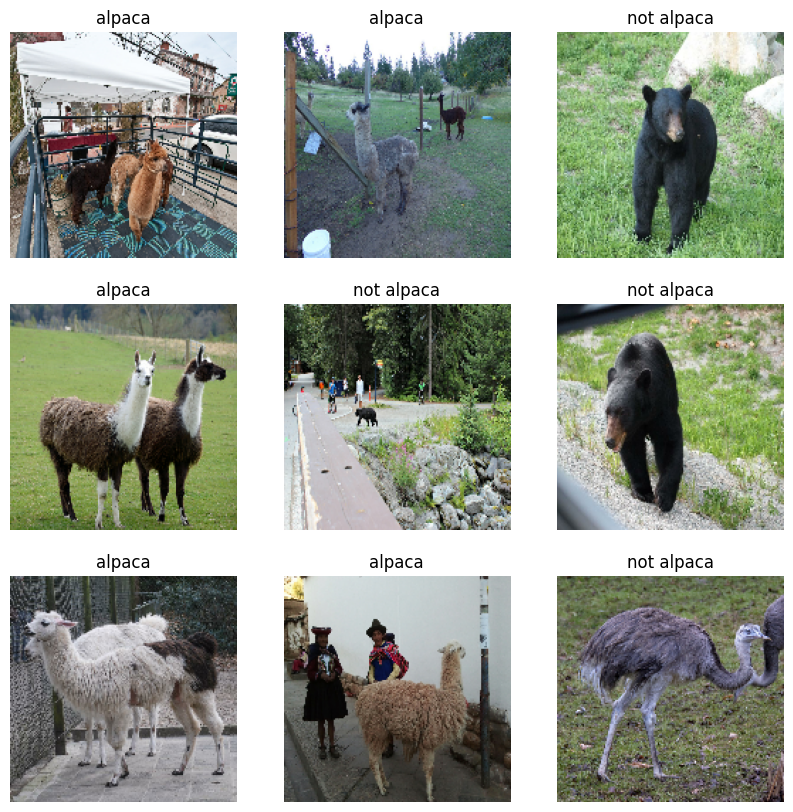

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## A Simple Model

Before we use transfer learning, let's try to build a simple convolutional model of our own. Specifically, create a binary classification model for our problem. Be sure to use some convolutional layers and some pooling layers.

In [6]:
inputs = keras.Input(shape=(160, 160, 3))
x = layers.Rescaling(1./255)(inputs)

#YOUR CODE HERE
x = keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu") (inputs)
x = keras.layers.MaxPooling2D(pool_size = 2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

#END CODE

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

We'll now compile the model you created, using a binary crossentry loss, and an rmsprop optimizer. We'll also keep track of the accuracy.

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Let's train! This may take a minute.

In [8]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset)

Epoch 1/10
9/9 [==============================] - 3s 264ms/step - loss: 655.6883 - accuracy: 0.4847 - val_loss: 12.1606 - val_accuracy: 0.6769
Epoch 2/10
9/9 [==============================] - 3s 238ms/step - loss: 4.1385 - accuracy: 0.5344 - val_loss: 0.8630 - val_accuracy: 0.6923
Epoch 3/10
9/9 [==============================] - 3s 222ms/step - loss: 0.7590 - accuracy: 0.7176 - val_loss: 1.0856 - val_accuracy: 0.5231
Epoch 4/10
9/9 [==============================] - 3s 240ms/step - loss: 0.4564 - accuracy: 0.7824 - val_loss: 1.2395 - val_accuracy: 0.4615
Epoch 5/10
9/9 [==============================] - 2s 226ms/step - loss: 2.2499 - accuracy: 0.6527 - val_loss: 0.7097 - val_accuracy: 0.7077
Epoch 6/10
9/9 [==============================] - 3s 246ms/step - loss: 0.3592 - accuracy: 0.8359 - val_loss: 0.7711 - val_accuracy: 0.6154
Epoch 7/10
9/9 [==============================] - 3s 254ms/step - loss: 0.4914 - accuracy: 0.8702 - val_loss: 1.0491 - val_accuracy: 0.5385
Epoch 8/10
9/9 [=

Let's see how the validation accuracy looks over the epochs:

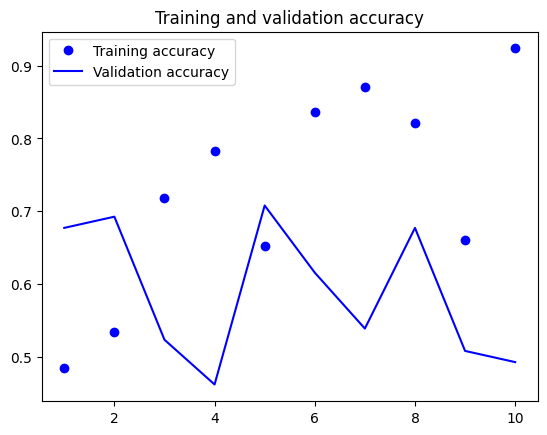

In [9]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

That probably doesn't look great. Don't worry, it's not supposed to.

## Data Augmentation

To increase diversity in the training set and help your model learn the data better, it's standard practice to augment the images by transforming them, i.e., randomly flipping and rotating them. Keras' Sequential API offers a straightforward method for these kinds of data augmentations, with built-in, customizable preprocessing layers.

As we did in Lecture 8, implement a function for data augmentation. Use a Sequential keras model composed of 3 layers:

* RandomFlip('horizontal')
* RandomRotation(0.2)
* RandomZoom(0.2)

In [10]:
def data_augmenter():
    '''
    Create a Sequential model composed of 3 layers
    Returns:
        tf.keras.Sequential
    '''
    #YOUR CODE HERE
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
        ]
    )

    #END CODE

    return data_augmentation

Let's test the code you wrote.

In [11]:
augmenter = data_augmenter()

assert(augmenter.layers[0].name.startswith('random_flip')), "First layer must be RandomFlip"
assert augmenter.layers[0].mode == 'horizontal', "RadomFlip parameter must be horizontal"
assert(augmenter.layers[1].name.startswith('random_rotation')), "Second layer must be RandomRotation"
assert augmenter.layers[1].factor == 0.2, "Rotation factor must be 0.2"
assert(augmenter.layers[2].name.startswith('random_zoom')), "Second layer must be RandomZoom"
assert augmenter.layers[2].height_factor == 0.2, "Zoom factor must be 0.2"

print('\033[92mAll tests passed!')

All tests passed!


Check out some of the augmented images:

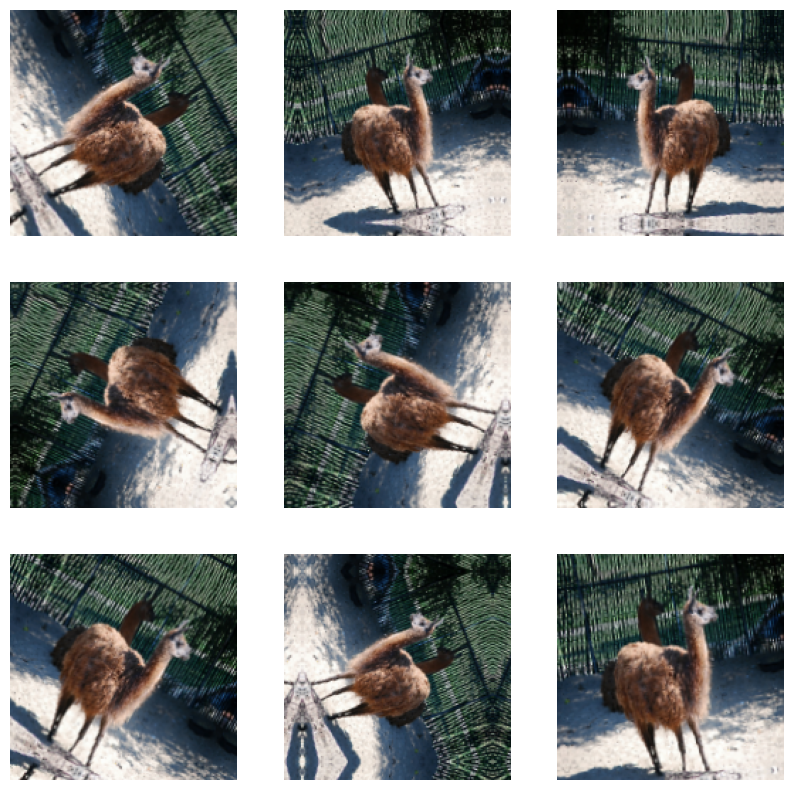

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = augmenter(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Let's see how the model you put together earlier does with this augmented data. (Just copy / paste the code you used above.)

In [13]:
inputs = keras.Input(shape=(160, 160, 3))
x = augmenter(inputs)
x = layers.Rescaling(1./255)(x)

#YOUR CODE HERE

x = keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu") (inputs)
x = keras.layers.MaxPooling2D(pool_size = 2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

#END CODE

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Epoch 1/10
9/9 [==============================] - 3s 278ms/step - loss: 433.9760 - accuracy: 0.5115 - val_loss: 12.9896 - val_accuracy: 0.3231
Epoch 2/10
9/9 [==============================] - 3s 229ms/step - loss: 2.6903 - accuracy: 0.5687 - val_loss: 1.1971 - val_accuracy: 0.6154
Epoch 3/10
9/9 [==============================] - 3s 241ms/step - loss: 0.4989 - accuracy: 0.7977 - val_loss: 0.7578 - val_accuracy: 0.7077
Epoch 4/10
9/9 [==============================] - 3s 237ms/step - loss: 6.0083 - accuracy: 0.6221 - val_loss: 0.9703 - val_accuracy: 0.6923
Epoch 5/10
9/9 [==============================] - 3s 221ms/step - loss: 0.4581 - accuracy: 0.7786 - val_loss: 0.8149 - val_accuracy: 0.6154
Epoch 6/10
9/9 [==============================] - 2s 229ms/step - loss: 0.1984 - accuracy: 0.9466 - val_loss: 1.0213 - val_accuracy: 0.6462
Epoch 7/10
9/9 [==============================] - 2s 227ms/step - loss: 12.0262 - accuracy: 0.6298 - val_loss: 1.0110 - val_accuracy: 0.6615
Epoch 8/10
9/9 [

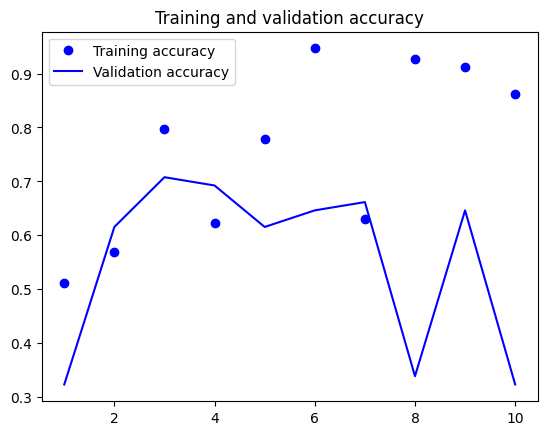

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset)

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

Again, probably not great.

### Transfer Learning from MobileNetV2 ###

MobileNetV2 was trained on ImageNet and is optimized to run on mobile and other low-power applications. It's 155 layers deep, and very efficient for object detection and image segmentation tasks, as well as classification tasks like this one.

To use this model, we'll load the pre-trained weights from ImageNet (the dataset from which it trained). We'll also normalize our inputs to be from $-1$ to $1$ (and not from $0$ to $255$).

In [15]:
IMG_SHAPE = IMG_SIZE + (3,)

#This is the MobileNetV2 model.
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

#This scales the input values so they're appropriate for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

14536120/14536120 [==============================] - 1s 0us/step


Print the model summary below to see all the model's layers, the shapes of their outputs, and the total number of parameters, trainable and non-trainable. It's pretty big!

In [16]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

Note the last two layers here. These are the so called top layers, and they are responsible for the classification in the model.

In [17]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

global_average_pooling2d
predictions


Let's see how this model does on our dataset.

In [18]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


Note that, for each image, there are 1000 predictions! The 1000 value refers to the 1000 classes the model was pretrained on. The predictions returned by the base model below follow this format:

First the class number, then a human-readable label, and last the probability of the image belonging to that class. You'll notice that there are two of these returned for each image in the batch - these the top two probabilities returned for that image.

In [19]:
base_model.trainable = False
image_var = tf.Variable(image_batch)
pred = base_model(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

35363/35363 [==============================] - 0s 2us/step


[[('n04589890', 'window_screen', 0.29608187),
  ('n02317335', 'starfish', 0.13659784)],
 [('n04589890', 'window_screen', 0.6286284),
  ('n03530642', 'honeycomb', 0.060480665)],
 [('n04589890', 'window_screen', 0.20266728),
  ('n03598930', 'jigsaw_puzzle', 0.1693061)],
 [('n04589890', 'window_screen', 0.36936516),
  ('n03598930', 'jigsaw_puzzle', 0.26770517)],
 [('n04589890', 'window_screen', 0.18484706),
  ('n04507155', 'umbrella', 0.115989104)],
 [('n03598930', 'jigsaw_puzzle', 0.63174665),
  ('n03733281', 'maze', 0.15338741)],
 [('n04589890', 'window_screen', 0.2656866),
  ('n04590129', 'window_shade', 0.06962194)],
 [('n04589890', 'window_screen', 0.51422983),
  ('n04507155', 'umbrella', 0.05346948)],
 [('n04589890', 'window_screen', 0.16013831),
  ('n02098286', 'West_Highland_white_terrier', 0.06643672)],
 [('n04589890', 'window_screen', 0.39502704),
  ('n03598930', 'jigsaw_puzzle', 0.049071692)],
 [('n04589890', 'window_screen', 0.29611295),
  ('n03598930', 'jigsaw_puzzle', 0.2328

Uh-oh. There's a whole lot of labels here, some of them hilariously wrong, but none of them say "alpaca."

This is because MobileNet pretrained over ImageNet doesn't have the correct labels for alpacas, so when you use the full model, all you get is a bunch of incorrectly classified images.

<center>
    <div>
        <img src="https://drive.google.com/uc?export=view&id=1aE4i02438uMNK7jPA2CcCdeFpbTKzupl" width = 300/>
    </div>
</center>

Fortunately, you can delete the top layer, which contains all the classification labels, and create a new classification layer.

Let's use a pretrained model to modify the classifier task so that it's able to recognize alpacas. You can achieve this in three steps:

1. Delete the top layer (the classification layer)
    * Set `include_top` in `base_model` as False
2. Add a new classifier layer
    * Train only one layer by freezing the rest of the network
    * As mentioned before, a single neuron is enough to solve a binary classification problem.
3. Freeze the base model and train the newly-created classifier layer
    * Set `base model.trainable=False` to avoid changing the weights and train *only* the new layer
    * Set training in `base_model` to False to avoid keeping track of statistics in the batch norm layer

**Resources consulted:**
* https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

In [32]:
def alpaca_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    ''' Define a tf.keras model for binary classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''


    input_shape = image_shape + (3,)

    ### START CODE HERE

    #This is the MobileNetV2 model.
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

    # Freeze the base model by making it non trainable
    base_model.trainable = False

    # create the input layer (Same as the imageNetv2 input size)
    inputs = keras.Input(shape=(160, 160, 3))

    # apply data augmentation to the inputs
    x = augmenter(inputs)

    # data preprocessing using the same weights the model was trained on
    # Already Done -> preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

    # set training to False to avoid keeping track of statistics in the batch norm layer
    base_model.training = False

    # Add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = base_model(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.2)(x)
    
    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = keras.layers.Dense(1 ,activation='linear')

    ### END CODE HERE

    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)

    return model

In [33]:
model2 = alpaca_model(IMG_SIZE, augmenter)

The base learning rate has been set for you, so you can go ahead and compile the new model and run it for 10 epochs:

Note: I am running this on an M1 Mac so I changed the optimizer because I received the following warning:

```WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.```

In [35]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
initial_epochs = 10
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/10
9/9 [==============================] - 4s 205ms/step - loss: 1.2617 - accuracy: 0.4733 - val_loss: 0.7858 - val_accuracy: 0.4154
Epoch 2/10
9/9 [==============================] - 2s 166ms/step - loss: 0.8045 - accuracy: 0.5763 - val_loss: 0.9041 - val_accuracy: 0.4615
Epoch 3/10
9/9 [==============================] - 2s 172ms/step - loss: 0.6776 - accuracy: 0.6145 - val_loss: 0.7779 - val_accuracy: 0.4923
Epoch 4/10
9/9 [==============================] - 2s 169ms/step - loss: 0.6389 - accuracy: 0.6679 - val_loss: 0.6819 - val_accuracy: 0.6000
Epoch 5/10
9/9 [==============================] - 2s 158ms/step - loss: 0.6127 - accuracy: 0.6527 - val_loss: 0.7183 - val_accuracy: 0.5692
Epoch 6/10
9/9 [==============================] - 2s 173ms/step - loss: 0.7022 - accuracy: 0.6603 - val_loss: 0.7272 - val_accuracy: 0.5692
Epoch 7/10
9/9 [==============================] - 2s 178ms/step - loss: 0.7540 - accuracy: 0.5992 - val_loss: 0.6830 - val_accuracy: 0.5385
Epoch 8/10
9/9 [====

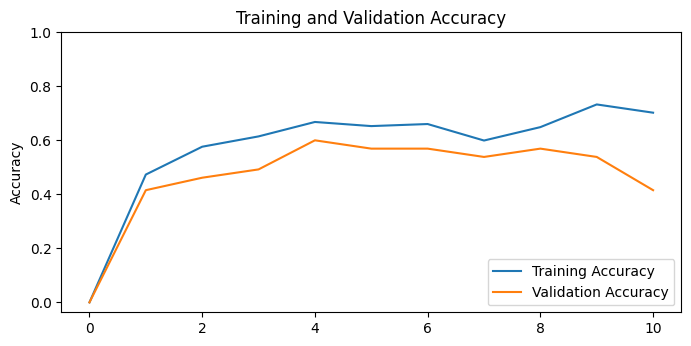

In [37]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

Alright! Transfer learning for the win.
<center>
    <div>
        <img src="https://drive.google.com/uc?export=view&id=1jjV9teAyrbNFDB1o8shMLpD6CrrllxWa" width = 300/>
    </div>
</center>

For this assignment, you should upload the modified Jupyter notebook (in which all the code you're asked to implement has been implemented) to Canvas.